# Radioactive Decay Statistics for Cs-137
#### Data collected on 05/14/2024 by Pahulpreet Cheema
#### Lab Partner: Kay Xiong
#### Lab Instructor: Andrew Liggett
#### Professor: Dr. Daniel Cebra
#### Last edited: 08/29/2024

This data was collected for a lab project that I did in my experimental techniques class at UC Davis. The objective of this project was to measure the radioactive decay of a Cesium-137 source and compare it to the background radiation. My lab partner and I used a geiger counter and a timer to take our data. We set the voltage on the geiger counter by looking at the local maximum on our oscilloscope.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline
from IPython.display import Image

There were an average of 823.3 counts every 2.5 seconds for the cesium-137 source. This comes out to an average of 329.3 counts per second. For the background radiation, there were an average of 4.1 counts every 10 seconds or 0.41 counts per second.

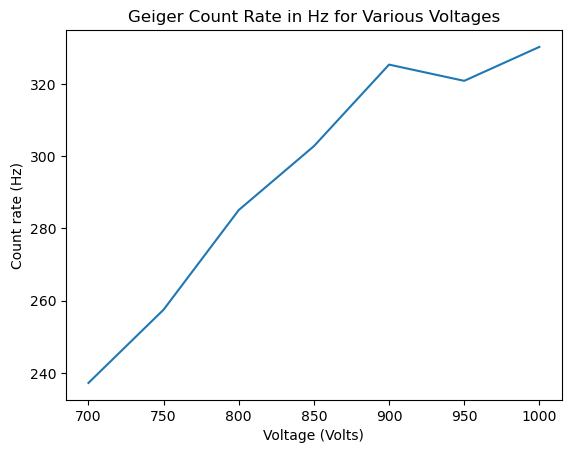

In [2]:
voltage_data = np.loadtxt('plot.txt', unpack = True)
voltages = []
count_numbers = []

with open('plot.txt', 'r') as file:
    for line in file:
        x, y = map(float, line.split())
        voltages.append(x)
        #Since the given data for counts (y-values) is per 10 seconds, we divide by 10 for the rate in Hz
        count_numbers.append(y/10)

plt.plot(voltages, count_numbers, linestyle='-')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Count rate (Hz)')
plt.title('Geiger Count Rate in Hz for Various Voltages')
plt.show()

Text(0.5, 1.0, 'Background Radiation Count over a 10-sec Interval')

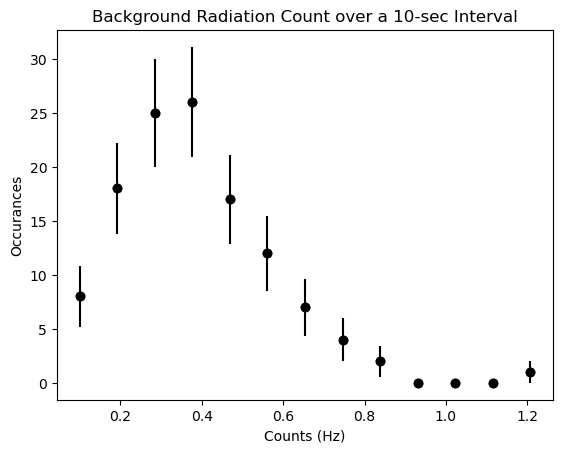

In [3]:
raw_bg_data = np.loadtxt('background.txt', unpack = True)
background_data = raw_bg_data/10
#We divide by 10 to get the amount in Hz
bg_counts, bg_edges = np.histogram(background_data, bins=13, range=(0.1,1.3))

plt.plot(bg_edges[:-1], bg_counts, "ko")
bg_errs = bg_counts**0.5
plt.errorbar(bg_edges[:-1], bg_counts, yerr=bg_errs, fmt="ko")
plt.xlabel("Counts (Hz)")
plt.ylabel("Occurances")
plt.title("Background Radiation Count over a 10-sec Interval")

Text(0.5, 1.0, 'Cs-137 Radiation Count over a 2.5-sec Interval')

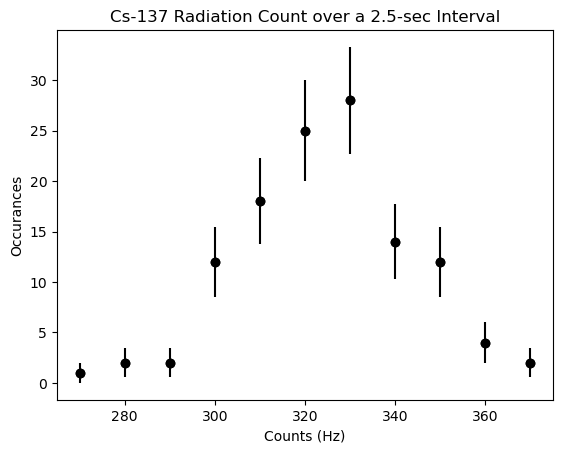

In [4]:
raw_cesium137_data = np.loadtxt('cesium.txt', unpack = True)
cesium137_data = raw_cesium137_data/2.5
#We divide by 2.5 to get the amount in Hz
cs137_counts, cs137_edges = np.histogram(cesium137_data, bins=11, range=(270,380))

plt.plot(cs137_edges[:-1], cs137_counts, "ko")
cs137_errs = cs137_counts**0.5
plt.errorbar(cs137_edges[:-1], cs137_counts, yerr=cs137_errs, fmt="ko")
plt.xlabel("Counts (Hz)")
plt.ylabel("Occurances")
plt.title("Cs-137 Radiation Count over a 2.5-sec Interval")

In [5]:
print("For background radiation:")
bg_mean = np.mean(background_data)
print("\nMean:")
print(bg_mean)

bg_variance = np.var(background_data)
print("\nVariance:")
print(bg_variance)

bg_sigma = bg_variance**0.5
print("\nSigma:")
print(bg_sigma)

For background radiation:

Mean:
0.41000000000000003

Variance:
0.0409

Sigma:
0.20223748416156684


This data refers to the counts observed in Hz from background radiation in the lab room over 10 second intervals.

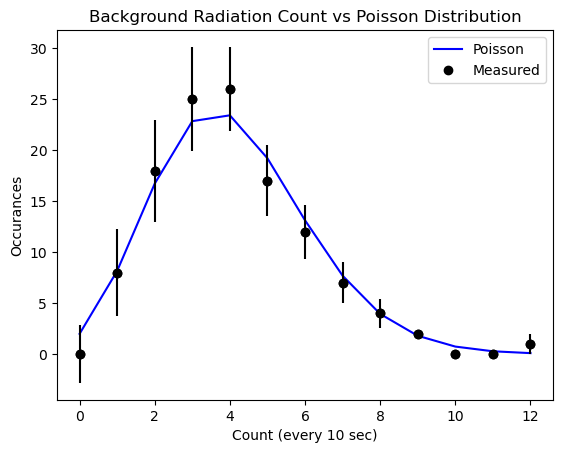

In [6]:
raw_bg_counts, raw_bg_edges = np.histogram(raw_bg_data, bins=13, range=(0,13))
raw_bgmean = np.mean(raw_bg_data)
data_points=120
interval= 1 #Didn't include the 2.5 sec interval because the data is raw
scale = data_points * interval

raw_bg_xpred = raw_bg_edges[:-1]
raw_bg_ypred = scale* poisson.pmf(raw_bg_xpred, raw_bgmean)

plt.plot(raw_bg_xpred, raw_bg_ypred, "b-", label="Poisson")
plt.plot(raw_bg_edges[:-1], raw_bg_counts, "ko", label="Measured")
plt.errorbar(raw_bg_edges[:-1], raw_bg_counts, yerr=bg_errs, fmt="ko")
plt.xlabel("Count (every 10 sec)")
plt.ylabel("Occurances")
plt.title("Background Radiation Count vs Poisson Distribution")
plt.legend()

The reason why I plotted the raw data instead of the data in Hz is because of errors in the poisson.pmf function that I encountered with the adjusted data.

In [7]:
print("For Cesium-137 source:")
cs137_mean = np.mean(cesium137_data)
print("\nMean:")
print(cs137_mean)

cs137_variance = np.var(cesium137_data)
print("\nVariance:")
print(cs137_variance)

cs137_sigma = cs137_variance**0.5
print("\nSigma:")
print(cs137_sigma)

For Cesium-137 source:

Mean:
329.3233333333334

Variance:
340.4181222222223

Sigma:
18.45042336159857


This data refers to the counts observed in Hz from an emitting Cs-137 source over time intervals of 2.5 seconds.

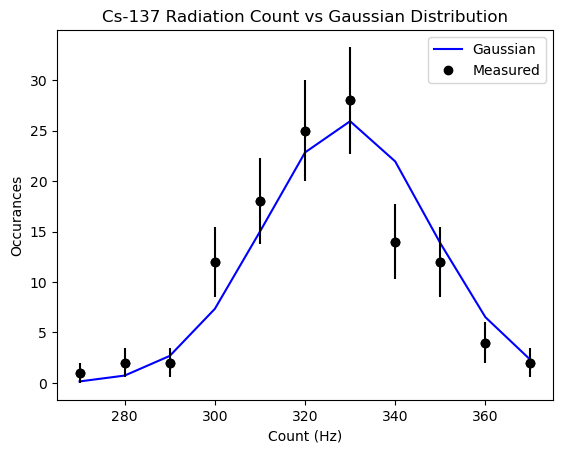

In [8]:
source_interval= 10
scalar = data_points * source_interval
cs137_xpred = cs137_edges[:-1]
cs137_ypred = scalar * norm.pdf(cs137_xpred, loc=cs137_mean, scale=cs137_sigma)

plt.plot(cs137_xpred, cs137_ypred, "b-", label="Gaussian")
plt.plot(cs137_edges[:-1], cs137_counts, "ko", label="Measured")
cs137_errs = cs137_counts**0.5
plt.errorbar(cs137_edges[:-1], cs137_counts, yerr=cs137_errs, fmt="ko")
plt.xlabel("Count (Hz)")
plt.ylabel("Occurances")
plt.title("Cs-137 Radiation Count vs Gaussian Distribution")
plt.legend()

The background radiation in the lab room mostly comes from the cosmic microwave background, the overhead lights, and the many cesium-137 sources present in the room.

I would expect the background radiation in my bedroom to slightly lower than that in the lab room because there is only one overhead light, and no alpha or gamma emitters. However, the difference isn't very great because I am still exposed to the cosmic microwave background.

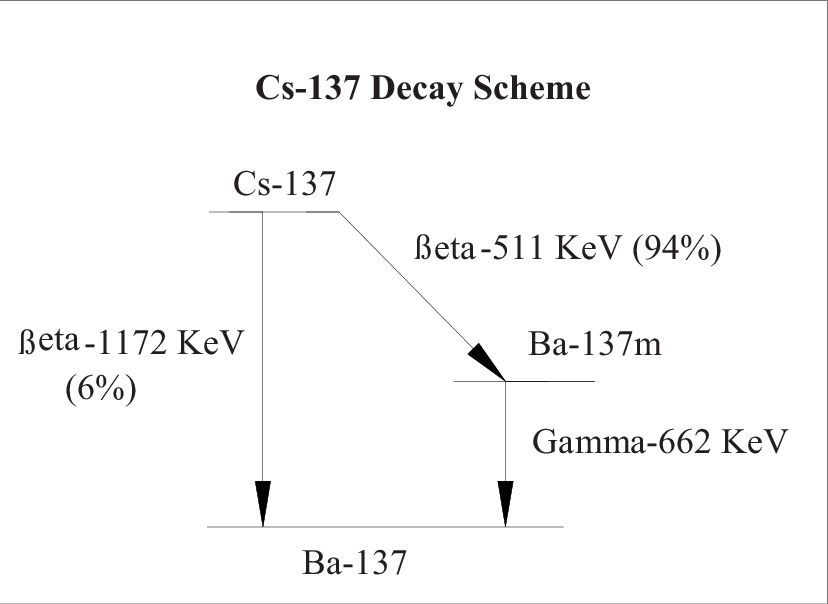

In [9]:
image = Image(filename="Cs-137-decay-scheme.png", width = 600, height = 300)
display(image)

When Cs-137 decays, it always releases beta particles (high energy electrons or positrons) and gamma rays (most of the time). Most of the counts in our data are from electrons being emitted by the Cs-137 source in the geiger tube.